# Forward Contracts

This notebook introduces forward contracts and applies the forward-spot parity to different assets.

## Load Packages and Extra Functions

In [1]:
using Printf

include("jlFiles/printmat.jl");

In [2]:
using Plots

#pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :png)

# Present Value

With a continuously compounded interest rate $y$, the present value of receiving $Z$ in $m$ years is 

$e^{-my}Z$.

In [3]:
y  = 0.05
m  = 3/4
Z  = 100
PV = exp(-m*y)*Z

printlnPs("PV of $Z when m=$m and y=$y: ",PV)

PV of 100 when m=0.75 and y=0.05:     96.319


# Payoff of Forward Contract

The payoff of a forward contract (at expiration, $m$ periods ahead) is $S_{m}-F$, where $S_m$ is the values of the underlying (at expiration) and $F$ is the forward price (agreed upon at inception of the contract).

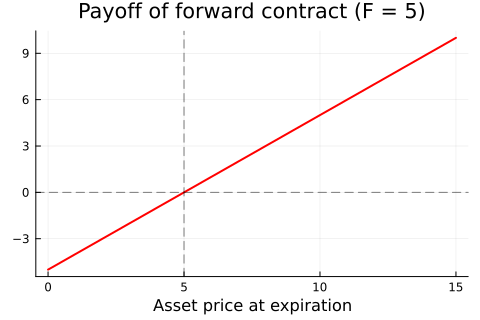

In [4]:
Sₘ = range(0,15,length=16)   #possible values of the underlying price at expiration
F  = 5
ForwardPayoff = Sₘ .- F

p1 = plot( Sₘ,ForwardPayoff,
           linecolor = :red,
           linewidth = 2,
           legend = false,
           title = "Payoff of forward contract (F = $F)",
           xlabel = "Asset price at expiration" )
hline!([0],linecolor=:black,line=(:dash,1,0.5))
vline!([F],linecolor=:black,line=(:dash,1,0.5))
display(p1)

# Forward-Spot Parity

For an asset without dividends (at least until expiration of the forward contract), 

$F=e^{my}S,$ 

where $F$ is the forward proce, $S$ the *current* spot price, $m$ the time to expiration of the forward contract and $y$ the interest rate.

In contrast, for an asset with continuous dividends at the rate $\delta$, 

$F=e^{m(y-\delta)}S$.

In [5]:
y   = 0.05         #interest rate
m   = 3/4          #time to expiration (in years)
S   = 100          #spot price now, assumed to be the same across δ values
F_A = exp(m*y)*S   #forward price

δ   = 0.01             #dividend rate 
F_B = exp(m*(y-δ))*S   #forward price when there are dividends

printblue("Forward prices:")
printmat([F_A F_B],colNames=["no dividends";"with dividends"],width=16)

Forward prices:
    no dividends  with dividends
         103.821         103.045



### Forward Price of a Bond

The forward price (in a forward contract with expiration in $m$) of a bond that matures in $n \geq m$ is 

$F=e^{my(m)}B(n),$ 

where $y(m)$ denotes the interest for an $m$-period loan.

By definition, $1/B(m)= e^{my(m)}$. Combine to get 

$F=B(n)/B(m)$.

In [6]:
m  = 5              #time to expiration of forward
n  = 7              #time to maturity of bond 
ym = 0.05           #interest rates 
yn = 0.06
Bm = exp(-m*ym)     #bond price now, maturity m
Bn = exp(-n*yn)     #bond price, maturity n
F  = Bn/Bm          #forward price a bond maturing in n, delivered in m

printblue("Bond and forward prices, assuming a face value of 1:")
xx = [Bm,Bn,F]
printmat(xx,colNames=["price"],rowNames=["$(m)y-bond","$(n)y-bond","$(m)y->$(n)y forward"])

Bond and forward prices, assuming a face value of 1:
                   price
5y-bond            0.779
7y-bond            0.657
5y->7y forward     0.844



### Covered Interest Rate Parity

The "dividend rate" on foreign currency is the foreign interest rate $y^*$ (since you can keep the foreign currency on a foreign bank/money market account). The forward-spot parity then gives

$F=e^{m(y-y^*)}S$.

We also calculate the return on a "covered" strategy: *(a)* buy foreign currency (in $t=0$); *(b)* lend it abroad (in $t=0$); *(c)* enter a forward on the domestic currency (in $t=0$); *(d)* pay the forward price and get domestic currency (in $t=m$). The return should be the same as the domestic interest rate.

In [7]:
m     = 1            #time to expiration
y     = 0.0665       #domestic interest rate
ystar = 0.05         #foreign interest rate 
S     = 1.2          #exchange rate now

F = exp(m*(y-ystar))*S

printlnPs("Forward price of foreign currency: ",F)

R    = exp(ystar)*F/S - 1             #return on the covered strategy
logR = log(1+R)                       #log return

printblue("\nReturn/rate:")
printmat([logR,y],rowNames=["covered FX strategy","domestic interest rate"],prec=4)

printred("the two returns should be the same")

Forward price of foreign currency:      1.220

Return/rate:
covered FX strategy       0.0665
domestic interest rate    0.0665

the two returns should be the same
